# PCA para Reconhecimento de dígitos

In [1]:
import gzip
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Dados de Teste

In [2]:
# Dados de teste
test_digits = [[] for _ in range(10)]

with gzip.open('zip.test.gz','rb') as f: 
    for line in f.readlines():
        elements = line.split()
        idx = float(elements[0])
        numbers = [float(element) for element in elements[1:]]
        test_digits[int(idx)].append(numbers)

In [3]:
N = 0
for digit in test_digits:
    N += len(digit)

IMG_SIZE = 256

mat_teste = np.zeros((IMG_SIZE, N))
i = 0
for digit in test_digits:
    for img in digit:
        mat_teste[:, i] = img
        i += 1

In [4]:
mat_teste.shape

(256, 2007)

## Dados de Treino

In [5]:
# Dados de treino
digits = [[] for _ in range(10)]

with gzip.open('zip.train.gz','rb') as f: 
    for line in f.readlines():
        elements = line.split()
        idx = float(elements[0])
        numbers = [float(element) for element in elements[1:]]
        digits[int(idx)].append(numbers)

In [6]:
# Obtendo matriz de pixels onde cada coluna é uma imagem.
# Matriz de tamanho (256, 7291)

N = 0
for digit in digits:
    N += len(digit)

IMG_SIZE = 256

mat_pixels = np.zeros((IMG_SIZE, N))
i = 0
for digit in digits:
    for img in digit:
        mat_pixels[:, i] = img
        i += 1

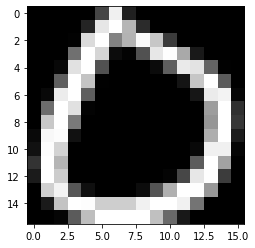

In [7]:
# Plotando imagem aleatória
digit_img = mat_pixels[:, 0].reshape((16, 16))
plt.imshow(digit_img, cmap='gray', vmin=-1, vmax=1)
plt.show()

In [8]:
# Obtendo a média de cada pixel para todas as imagens

mat_media = np.mean(mat_pixels, axis=1)
mat_media = np.reshape(mat_media, (-1, 1))

In [9]:
# Subtraindo cada pixel da matriz de pixels pela média

mat_centrada = mat_pixels - mat_media

In [10]:
# Aplicando PCA na matriz centrada

pca = PCA()

dados_transformados = pca.fit_transform(np.transpose(mat_centrada))
componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_
variancia_acumulada = np.cumsum(variancia_explicada)

print("Dados transformados:\n", dados_transformados)
print("\nComponentes principais:\n", componentes_principais)
print("\nVariância acumulada:\n", variancia_acumulada)

Dados transformados:
 [[ 5.96417573e+00 -2.43858082e-01  7.26570938e+00 ...  1.27390104e-02
  -1.23008690e-03 -1.84926156e-02]
 [ 3.98094770e+00 -3.04743457e-01 -6.35009482e+00 ...  3.50535710e-03
   2.57526409e-03  3.01210925e-03]
 [ 7.69475808e+00 -9.94398295e-01 -7.08552205e-01 ...  9.78923048e-03
   8.10869289e-03 -4.81231385e-03]
 ...
 [-1.82224615e+00  3.65590368e+00 -4.59893164e+00 ... -6.16014677e-03
   2.80515320e-03  8.16767568e-04]
 [-3.29290555e+00  2.94707432e+00 -1.47724829e-01 ... -4.45025990e-03
   1.56886711e-03  6.76551632e-04]
 [-2.71026526e+00  6.04657994e+00  7.00120506e-01 ...  6.03122769e-03
   9.00852222e-03 -6.65708367e-03]]

Componentes principais:
 [[-7.49436570e-05 -3.75198004e-04  5.97100964e-05 ...  3.27414017e-03
   1.40775226e-03  3.07120479e-04]
 [ 1.09434690e-03  5.63882241e-03  1.29255631e-02 ...  1.71486592e-03
   1.26625443e-03  3.59728661e-04]
 [ 4.73250403e-04  2.97608120e-03  4.58941948e-03 ...  1.68608228e-03
   1.40628355e-03  3.58313407e-04]
 

**Observando os 20 primeiros autovalores**

<BarContainer object of 20 artists>

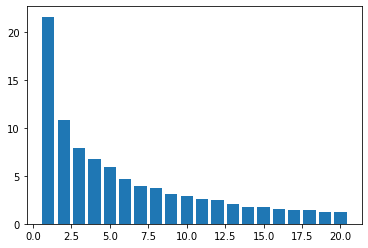

In [11]:
autovalores = pca.explained_variance_

plt.bar(range(1, 21), autovalores[:20])

**Autovalores acumulados**

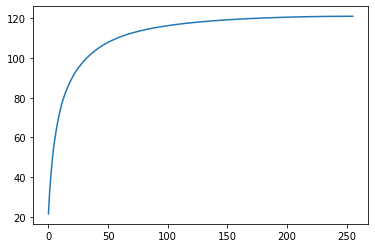

In [13]:
plt.plot(range(len(autovalores)), np.cumsum(autovalores))

## Utilizando os primeiros k autovetores para aproximação

In [23]:
# Função para obter coeficiente usando k autovetores
# Utilizando primeira foto do conjunto de teste

def get_coef(k):
    autovetores_ = componentes_principais[:k]
    auto_faces = np.reshape(autovetores_, (k, 16, 16))
    coef = autovetores_.dot(np.reshape(mat_teste[:, 0], (-1,1)) - mat_media)
    return coef

In [24]:
# Exemplo: obtendos os coeficientes para 5 autovetores 

coef = get_coef(5)
coef

array([[ 9.22744354],
       [-2.36375671],
       [ 3.26961467],
       [-0.30616418],
       [-1.66447244]])

In [25]:
foto_teste = mat_teste[:, 0].reshape((16, 16))
aproximacoes = [foto_teste]

for i in range(2, 21):
    coef = get_coef(i)
    aprox_vetor = mat_media + np.transpose(componentes_principais[:i]).dot(coef)
    aprox_vetor = aprox_vetor.reshape((16,16))
    aproximacoes.append(aprox_vetor)

**Um dígito e sucessivas aproximações usando 2, 3, até 20 autovetores**

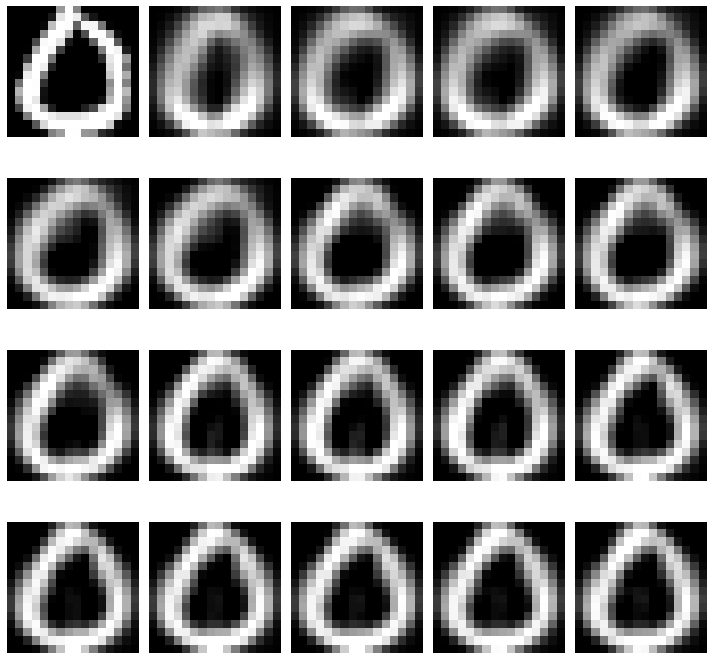

In [26]:
num_linhas = 4
num_colunas = 5

# Crie a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 10))

# Itere sobre as imagens e plote-as nos subplots
for i in range(len(aproximacoes)):
    linha = i // 5  # Índice da linha atual
    coluna = i % 5  # Índice da coluna atual
    
    # Use o subplot correspondente para plotar a imagem
    axs[linha, coluna].imshow(aproximacoes[i], cmap='gray', vmin=-1, vmax=1)
    axs[linha, coluna].axis('off')  # Desative os eixos
    
# Ajuste os espaçamentos entre os subplots
plt.tight_layout()

# Exiba o gráfico resultante
plt.show()

# Classificação de dígitos usando k Componentes

In [27]:
k=20
coef_treino = componentes_principais[:k].dot(mat_pixels - mat_media)

In [28]:
coef_treino.shape

(20, 7291)

In [45]:
idx = 0
coefmedio = np.zeros((k, len(digits)))
i = 0
idx_anterior = 0
for digit in digits:
    idx += len(digit)
    coefmedio[:, i] = np.mean(coef_treino[:, idx_anterior:idx], axis=1)
    idx_anterior = idx
    i += 1

In [46]:
coefmedio.shape

(20, 10)

## Aplicando Classificador em um exemplo da Matriz de teste

In [48]:
mat_teste.shape

(256, 2007)

In [52]:
coef = componentes_principais[:k].dot(mat_teste - mat_media)

In [53]:
coef.shape

(20, 2007)

In [58]:
# Obtendo Classificação da primeira imagem de um dígito 0
# da matriz de Teste. O resultado obtido é correto (0)

classification = np.argmin(np.mean((coefmedio - coef[:, 0:1])**2, axis = 0))
classification

0

## Coletando métricas para diferentes valores de k

In [78]:
def matriz_contingencia(k):
    C = np.zeros((10, 10))
    test_coef = coef[:k]
    mean_coef = coefmedio[:k]
    num_test = 2007
    idx = 0
    for i in range(10):
        for j in range(len(test_digits[i])):
            digit_class = np.argmin(np.mean((mean_coef - test_coef[:, idx:idx+1])**2, axis = 0))
            C[i][digit_class] += 1
            idx += 1
    return C

**Matrizes de Contingência e proporção dos dados na diagonal para k=5, 10, 15 e 20**

A maior proporção de imagens classificadas corretamente foi para k=20, sendo 80%

**k = 5**

In [79]:
C5 = matriz_contingencia(5)
C5

array([[271.,   0.,   8.,   2.,   5.,   8.,  55.,   0.,  10.,   0.],
       [  0., 259.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,   0.],
       [ 12.,   6., 106.,  13.,  18.,   9.,  10.,   0.,  21.,   3.],
       [  7.,   0.,   6., 104.,   1.,  19.,   1.,   0.,  27.,   1.],
       [  2.,  10.,  14.,   0., 118.,   1.,   7.,  19.,   3.,  26.],
       [ 24.,   1.,  11.,  21.,   8.,  76.,   4.,   0.,  12.,   3.],
       [ 23.,   2.,   3.,   0.,   4.,   1., 136.,   0.,   1.,   0.],
       [  0.,   2.,   2.,   0.,  10.,   1.,   1., 107.,   3.,  21.],
       [  5.,   4.,  17.,   9.,   4.,  10.,   2.,   1., 100.,  14.],
       [  0.,  13.,   2.,   0.,  20.,   0.,   0.,  34.,  14.,  94.]])

In [83]:
prop = np.trace(C5) / 2007
prop

0.6831091180866966

**k = 10**

In [81]:
C10 = matriz_contingencia(10)
C10

array([[283.,   0.,   3.,   2.,   4.,   7.,  53.,   1.,   5.,   1.],
       [  0., 258.,   0.,   0.,   3.,   0.,   3.,   0.,   0.,   0.],
       [  7.,   2., 135.,  12.,  19.,   2.,   3.,   3.,  15.,   0.],
       [  4.,   0.,   3., 117.,   1.,  17.,   2.,   0.,  19.,   3.],
       [  1.,   7.,   7.,   0., 141.,   1.,   4.,   2.,   3.,  34.],
       [ 10.,   1.,   0.,  16.,   5., 110.,   3.,   0.,   9.,   6.],
       [ 20.,   0.,   5.,   0.,   4.,   4., 136.,   0.,   1.,   0.],
       [  0.,   2.,   3.,   0.,   7.,   0.,   0., 110.,   2.,  23.],
       [  3.,   2.,   7.,   9.,   5.,   7.,   3.,   1., 118.,  11.],
       [  0.,   9.,   1.,   0.,  19.,   1.,   0.,  10.,   3., 134.]])

In [84]:
prop = np.trace(C10) / 2007
prop

0.7683109118086696

**k = 15**

In [82]:
C15 = matriz_contingencia(15)
C15

array([[295.,   0.,   2.,   2.,   4.,   3.,  40.,   1.,  11.,   1.],
       [  0., 259.,   0.,   0.,   3.,   0.,   2.,   0.,   0.,   0.],
       [  7.,   0., 138.,  10.,  19.,   2.,   3.,   3.,  16.,   0.],
       [  6.,   0.,   5., 125.,   0.,  18.,   1.,   0.,   9.,   2.],
       [  1.,   7.,   5.,   0., 142.,   1.,   5.,   2.,   3.,  34.],
       [ 10.,   1.,   0.,  11.,   6., 116.,   2.,   0.,   7.,   7.],
       [ 15.,   0.,   4.,   0.,   4.,   4., 142.,   0.,   1.,   0.],
       [  0.,   2.,   4.,   0.,   7.,   0.,   0., 114.,   1.,  19.],
       [  4.,   2.,   5.,  10.,   5.,   6.,   0.,   1., 123.,  10.],
       [  0.,   7.,   0.,   0.,  18.,   1.,   0.,  11.,   4., 136.]])

In [85]:
prop = np.trace(C15) / 2007
prop

0.7922272047832586

**k = 20**

In [80]:
C20 = matriz_contingencia(20)
C20

array([[296.,   0.,   2.,   2.,   4.,   4.,  38.,   1.,  11.,   1.],
       [  0., 259.,   0.,   1.,   2.,   0.,   2.,   0.,   0.,   0.],
       [  6.,   0., 142.,   8.,  18.,   3.,   2.,   3.,  16.,   0.],
       [  6.,   0.,   4., 130.,   1.,  14.,   1.,   0.,   8.,   2.],
       [  1.,   6.,   5.,   0., 141.,   1.,   5.,   2.,   3.,  36.],
       [ 10.,   1.,   0.,  10.,   6., 119.,   0.,   0.,   7.,   7.],
       [ 14.,   0.,   4.,   0.,   4.,   4., 143.,   0.,   1.,   0.],
       [  0.,   2.,   2.,   0.,   7.,   0.,   0., 114.,   2.,  20.],
       [  4.,   2.,   5.,  10.,   6.,   6.,   0.,   1., 124.,   8.],
       [  0.,   5.,   0.,   0.,  16.,   1.,   0.,  12.,   4., 139.]])

In [86]:
prop = np.trace(C20) / 2007
prop

0.8006975585450922

## Calculando precisão e revocação para diferentes valores de k

In [88]:
for k in range(2, 21):
    C = matriz_contingencia(k)
    pm = 0
    rm = 0
    for i in range(10):
        pm += C[i][i] / np.sum(C[i, :])
        rm += C[i][i] / np.sum(C[:, i])
    pm /= 10
    rm /= 10
    print(f'Para k = {k}, Precisão = {pm}, Revocação = {rm}')

Para k = 2, Precisão = 0.4686365174985724, Revocação = 0.44853786356194203
Para k = 3, Precisão = 0.5248980717388914, Revocação = 0.5056647482499411
Para k = 4, Precisão = 0.649877920555018, Revocação = 0.6429857651446735
Para k = 5, Precisão = 0.6624169058665598, Revocação = 0.6602269321831126
Para k = 6, Precisão = 0.6953164864565248, Revocação = 0.6980385707027381
Para k = 7, Precisão = 0.7208520826115857, Revocação = 0.7235209649103054
Para k = 8, Precisão = 0.7330895334914668, Revocação = 0.7369293822341088
Para k = 9, Precisão = 0.748279756114935, Revocação = 0.7520998436505819
Para k = 10, Precisão = 0.7560915861968461, Revocação = 0.7599772474075097
Para k = 11, Precisão = 0.7640672707669066, Revocação = 0.7676512435058886
Para k = 12, Precisão = 0.7695541838479559, Revocação = 0.772367280335436
Para k = 13, Precisão = 0.7754388543026154, Revocação = 0.7782818234357115
Para k = 14, Precisão = 0.7801580411431714, Revocação = 0.7828976587239108
Para k = 15, Precisão = 0.780789912